<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao


# Hardware Cuantico real

---








Cargamos las credenciales de nuestra cuenta e importamos las librerias iniciales

In [4]:
from qiskit import IBMQ
#si falla el load_account() ejecutar antes un save_account()
#IBMQ.save_account('YOUR API KEY', overwrite=True)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2024-02-17 21:33:07,615: Credentials are already in use. The existing account in the session will be replaced.


Un [provider](https://docs.quantum.ibm.com/api/qiskit/providers) es un objeto que proporciona servicios externos a Terra, por ejemplo proporciona backends para la ejecucion de los sercivios.

Cuando cargamos nuestra cuenta podemos acceder a una serie de backends a través de la clase `Provider` de qiskit

### EJERCICIO

Itera `provider.backends()` e imprime por pantalla el resultado de sus metodos `.name()`, `.configuracion().n_qubits`

In [5]:
backends = provider.backends()

for ind in backends:
    print(ind.name(),ind.configuration().n_qubits)


ibmq_qasm_simulator 32
simulator_statevector 32
simulator_mps 100
simulator_extended_stabilizer 63
simulator_stabilizer 5000
ibm_brisbane 127
ibm_kyoto 127
ibm_osaka 127


Podemos usar la instruccion dir(obj) y vars(obj) para saber las propiedades y metodos que tiene el ultimo de los providers:

- Utiliza dir() para obtener una lista de todos los atributos (incluidos los métodos) del objeto.
- Utiliza vars() para obtener la propiedad __dict__ del objeto, que contiene variables de instancia

Prueba dir() sobre el objeto y sobre obj.configuracion()

Encuentra el conjunto de puertas base de cada backend

In [6]:
simulador = provider.backends()[-1]
dir(simulador.configuration())

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_channel_qubit_map',
 '_control_channels',
 '_data',
 '_get_channel_prefix_index',
 '_parse_channels',
 '_qubit_channel_map',
 'acquire',
 'acquisition_latency',
 'backend_name',
 'backend_version',
 'basis_gates',
 'channels',
 'conditional',
 'conditional_latency',
 'control',
 'control_channels',
 'coupling_map',
 'credits_required',
 'default_rep_delay',
 'describe',
 'description',
 'discriminators',
 'drive',
 'dt',
 'dtm',
 'dynamic_reprate_enabled',
 'from_dict',
 'gates',
 'get_channel_qubits',
 'get_qubit_channels',
 'hamiltonian',
 'local',
 'max_experiments',
 'max_shots',
 'm

In [7]:
simulador.configuration().gates

[GateConfig(id, [], gate id q { U(0, 0, 0) q; }, [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126]]),
 GateConfig(rz, ['theta'], gate rz(theta) q { U(0, 0, theta) q; }, [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18

## Ejecutando circuitos en HW cuántico: compilacion de circuitos

Los backends a los que tenemos acceso son:

In [8]:
[(b.name(), b.configuration().n_qubits) for b in provider.backends()]

[('ibmq_qasm_simulator', 32),
 ('simulator_statevector', 32),
 ('simulator_mps', 100),
 ('simulator_extended_stabilizer', 63),
 ('simulator_stabilizer', 5000),
 ('ibm_brisbane', 127),
 ('ibm_kyoto', 127),
 ('ibm_osaka', 127)]

In [9]:
# si se tiene acceso a mas de un hub:
#provider = IBMQ.get_provider("ibm-q-internal")
#[(b.name(), b.configuration().n_qubits) for b in provider.backends()]

Los vemos todos y consultamos cual es que tiene menos trabajos en cola (least busy)

Podemos usar la funcion `least_busy` para seleccionar el backend menos cargado en cada momento:

In [10]:
from qiskit.providers.ibmq import least_busy

backend = least_busy(provider.backends(
                simulator=False,
                filters=lambda b: b.configuration().n_qubits >= 2))
backend

<IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>

### EJECUCION DE UN CIRCUITO

Creamos nuestro circuito de 2 qubits, un estado de Bell

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


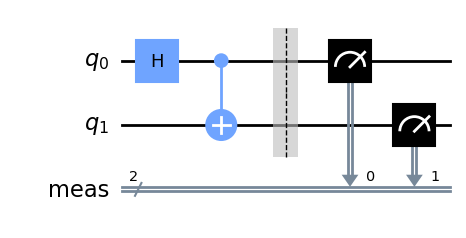

In [12]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw("mpl")

Lo ejecutamos siempre primero en un simulador

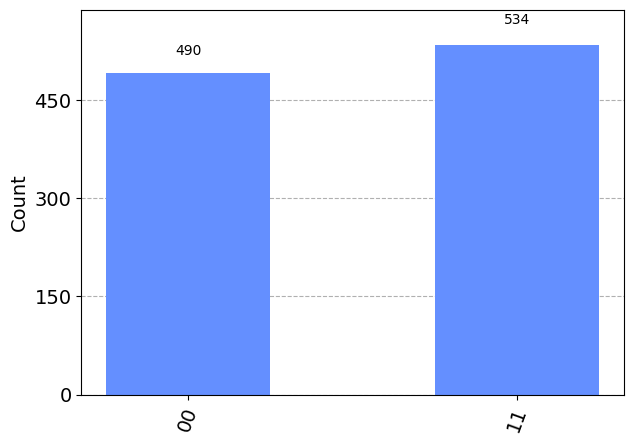

In [13]:
from qiskit import Aer
from qiskit.visualization import plot_histogram
sim = Aer.get_backend('aer_simulator')
result = sim.run(circuit).result()
counts = result.get_counts()
plot_histogram(counts)

In [11]:
#el metodo run sobre el backend crea un job 
job = sim.run(circuit)

In [12]:
job.result()

Result(backend_name='aer_simulator', backend_version='0.13.1', qobj_id='', job_id='858aac55-0545-437e-8ae9-91bb86a3cdba', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 524, '0x0': 500}), header=QobjExperimentHeader(creg_sizes=[['meas', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-152', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=3204107609, metadata={'time_taken': 0.001260181, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000317312, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 7929, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}, time_taken=0.001260181)], date=2024

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


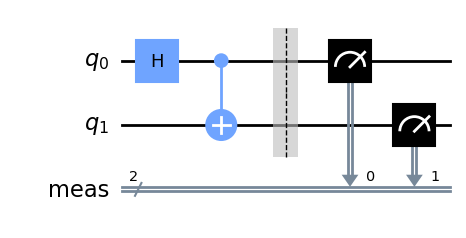

In [13]:
circuit.draw('mpl')

Vamos a lanzar la ejecucion de nuestro circuito al backend que tiene menos jobs en cola.

In [14]:
backend = least_busy(provider.backends(
                simulator=False,
                filters=lambda b: b.configuration().n_qubits >= 2))
backend

<IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>

Necesitamos transpilar el circuito al backend real

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


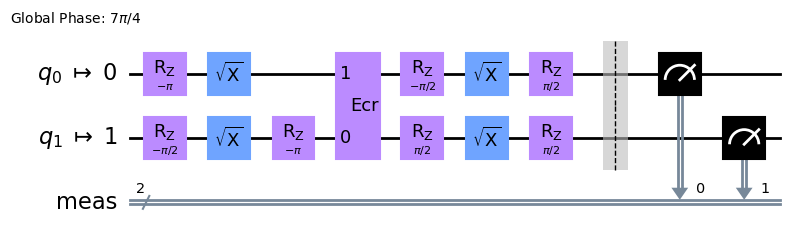

In [23]:
from qiskit import transpile

transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw("mpl",idle_wires=False, fold=-1) #sin idle wires y todo en una linea

Notese que `transpiling` puede no tomar un backend y entonces simplemente no hace ninguna operacion de compilado del circuito.

In [24]:
notranspiled_circuit = transpile(circuit)
notranspiled_circuit.draw(idle_wires=False, fold=-1) #la opcion fold controla la paginacion al dibujar el circuito, es este caso con valor -1 esta desactivada y idle_wires quita qubits no usados

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

Para el seguimiento de la ejecucion utilizamos la utilidad `job_watcher`, que nos va diciendo como estamos en la cola de forma interactiva

In [ ]:
from qiskit.tools.jupyter import *
%qiskit_job_watcher  #lanzamos el widget de job_watcher para hacer seguimiento

Ejecutamos el circuito

In [17]:
job = backend.run(transpiled_circuit)

Para ver el estado de ejecucion:

In [18]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [23]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

Cuando ha terminado obtenemos los resultados y podemos ver como se ha ejecutado nuestro circuito en el backend visualizando los qubits utilizados:

In [ ]:
import graphviz
from qiskit.visualization import plot_circuit_layout, plot_gate_map
display(plot_gate_map(backend))
plot_circuit_layout(transpiled_circuit, backend)

Podemos ver como se ha ejecutado el circuito en los qubits del dispositivo y el mapa de puertas que se ha utilizado:

In [ ]:
from qiskit.visualization import plot_circuit_layout, plot_gate_map

display(transpiled_circuit.draw(idle_wires=False))
display(plot_gate_map(backend))
plot_circuit_layout(transpiled_circuit, backend)

Tambien podemos ver los resutados a partir de un Job ID que ya se haya ejecutado

In [ ]:
backend = provider.get_backend('ibm_kyoto')
job = backend.retrieve_job('cpjnktz6q5h0008bjcn0') # otro en ibm_kyoto-> cpkv0mt6q5h0008bmxtg

result = job.result()
counts = result.get_counts()
plot_histogram(counts)

#### EJERCICIO

Creamos un circuito de 3  qubits y lo ejecutamos siguiendo los pasos siguientes:

- calculamos el backend menos ocupado
- transpilamos el circuito a ese backend, con o sin indicarle un `initial_layout`
- dibujamos el layout de como se ha desplegado nuestro circuito en el backend
- dibujamos el mapa de puertas del backend
- lo ejecutamos y obtenemos los resultados

In [26]:
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)

circuit.measure_all()

También podemos especificar el `layout` que se utiliza para desplegar nuestro circuito en el dispositivo. 

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


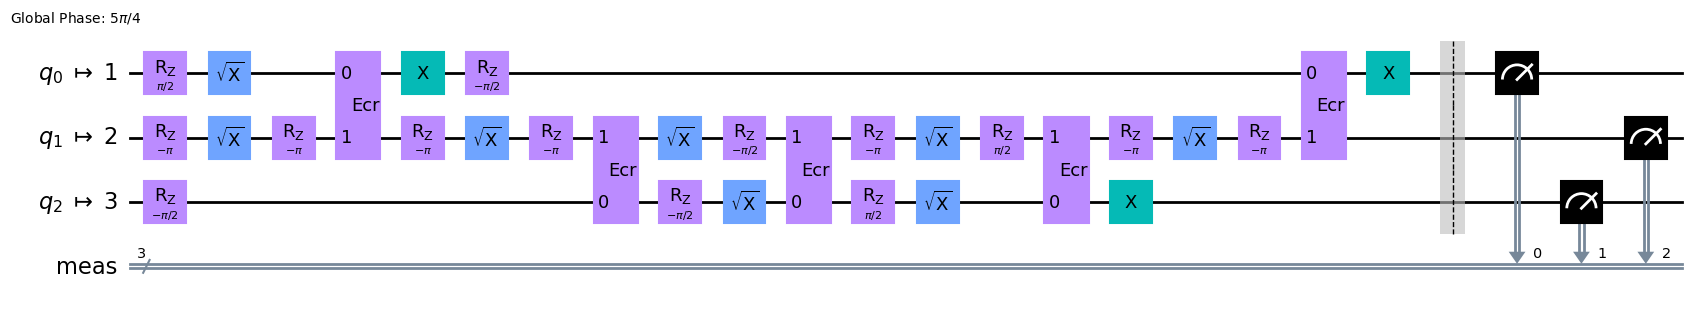

MissingOptionalLibraryError: "The 'graphviz' library is required to use 'plot_coupling_map'. You can install it with ''brew install graphviz' if on Mac, or by downloding it from their website'."

In [24]:
from qiskit import transpile
from qiskit.visualization import plot_circuit_layout
import graphviz

transpiled_circuit = transpile(circuit, backend, initial_layout=[1, 2, 3]) #elige como qubits 0,1,2 de nuestro circuito -> los qubits del dispositivo 1,2,3 por ejemplo
display(transpiled_circuit.draw("mpl",idle_wires=False))  #para evitar muchos qubits no usados en la representacion
display(plot_circuit_layout(transpiled_circuit, backend))
plot_gate_map(backend)

#### EJERCICIO

Comprueba la complejidad del circuito transpilado anterior, si no elegimos qubits que estén conectados

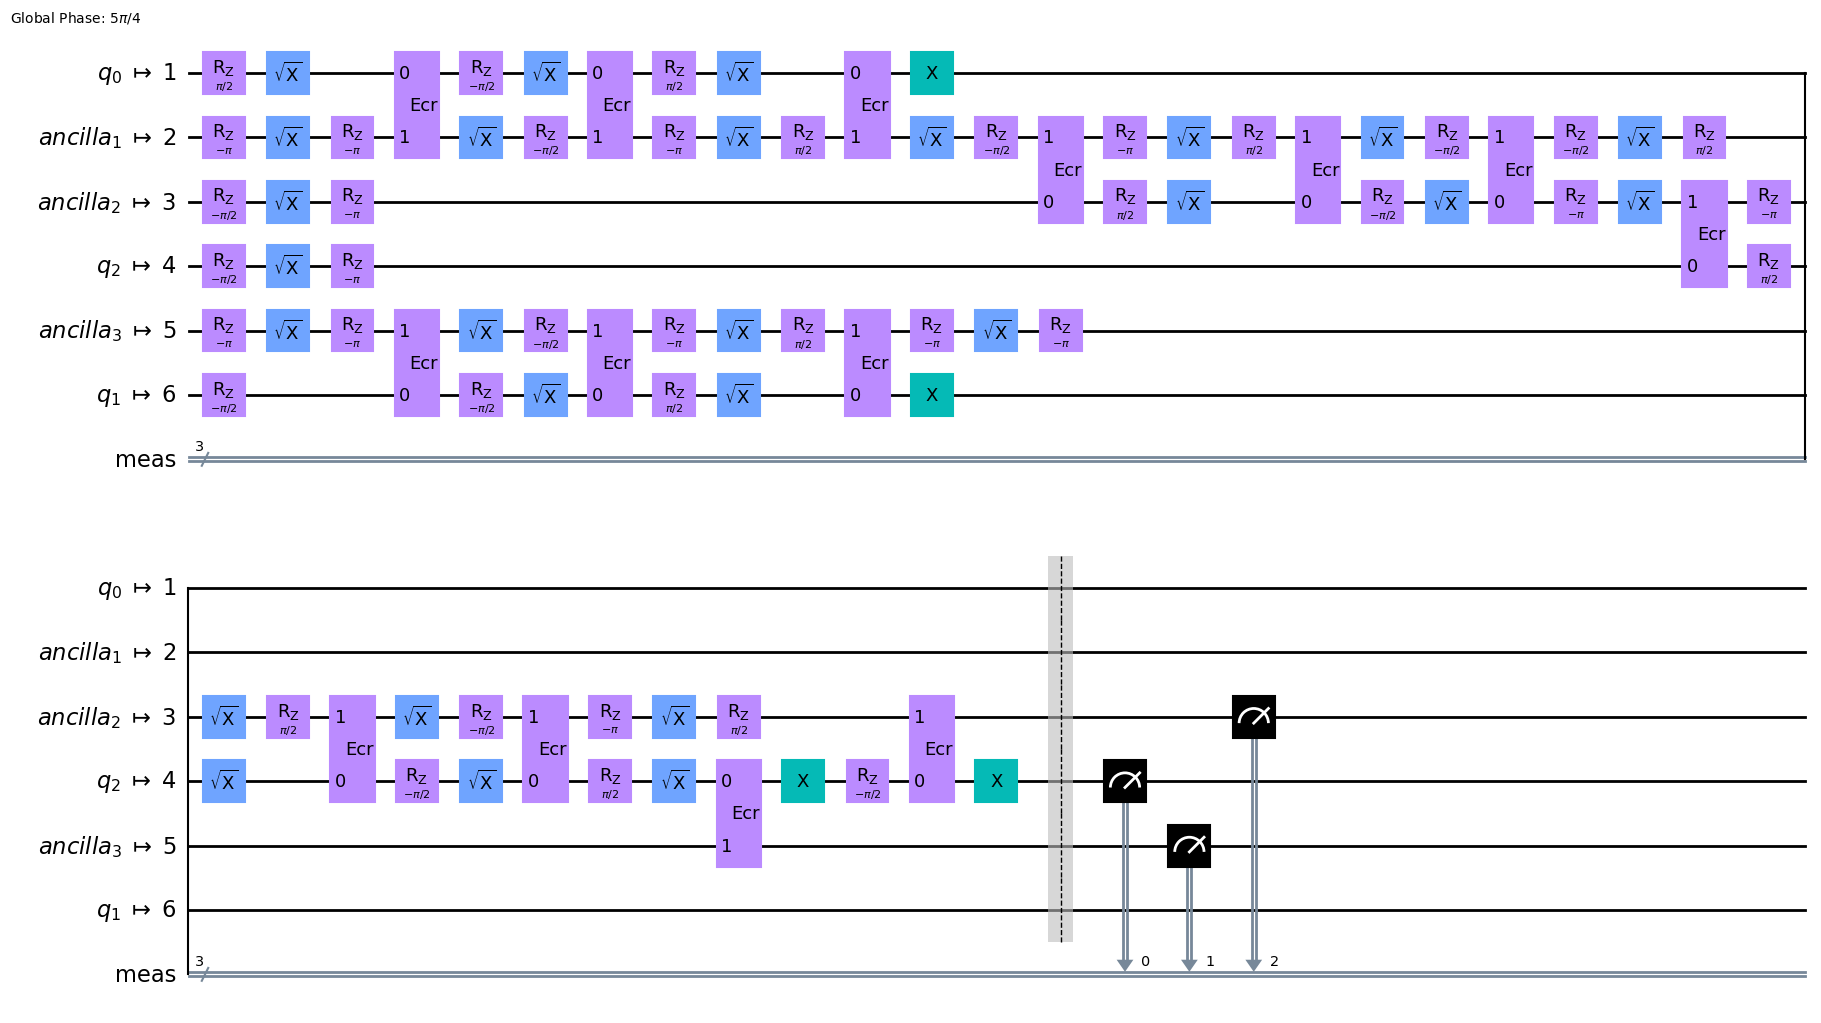

MissingOptionalLibraryError: "The 'graphviz' library is required to use 'plot_coupling_map'. You can install it with ''brew install graphviz' if on Mac, or by downloding it from their website'."

In [38]:
transpiled_circuit = transpile(circuit, backend, initial_layout=[1, 6, 4]) #elige como qubits 0,1,2 de nuestro circuito -> los qubits del dispositivo 1,2,3 por ejemplo
display(transpiled_circuit.draw("mpl",idle_wires=False))  #para evitar muchos qubits no usados en la representacion
display(plot_circuit_layout(transpiled_circuit, backend))
plot_gate_map(backend)

#### EJERCICIO

Para un circuito dado, elije el backend de ejecucion menos ocupado y transpilalo para su ejecucion.

Mapea tres qubits que esten conectados y dibuja el circuito resultante que se ejecutará en el ordenador cuántico.

In [ ]:
# Creamos este circuito
circuit = QuantumCircuit(3)
circuit.h([0,1,2])
circuit.ccx(0, 1, 2)
circuit.h([0,1,2])
circuit.ccx(2, 0, 1)
circuit.h([0,1,2])
circuit.measure_all()
circuit.draw()

In [ ]:
#Buscamos el Backend menos cargado


In [ ]:
#Transpilamos nuestro circuito para este Backend


Observamos la complejidad del circuito, si no elegimos qubits que estén conectados

In [ ]:
#Dibujamos como se ha desplegado el circuito en el backend y el mapa de puertas que hay disponibles para conectar los qubits


## Otras opciones de Backend

### Nivel de optimizacion

Podemos dejar que qiskit optimice el layout de nuestro circuito en el hardware cuantico. Los niveles más altos son niveles de mayor nivel de optimizacion a costa de un tiempo mayor para el transpiling

 * 0: sin optimizacion, mas alla de un despliegue con un mapeo especifico en el backend
 * 1: optimizacion ligera, colapsando puertas adyacentes en los qubits cercanos (default)
 * 2: optimizacion media con mapeado adaptativo de qubits, teniendo en cuenta el ruido de los qubits y las puertas y posibles efectos que lo aminoren o compensen entre si.
 * 3: optimizacion alta con mapeo adatativo de ruido de los qubits y puertas, para buscar que se aminore y compense
 
Veamos un ejemplo de utilizacion de este nivel de optimizacion:

In [25]:
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1,2)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw()

┌───┐                ░ ┌─┐      
   q_0: ┤ H ├──■─────────■───░─┤M├──────
        └───┘┌─┴─┐       │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■────┼───░──╫─┤M├───
             └───┘┌─┴─┐┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├┤ X ├─░──╫──╫─┤M├
                  └───┘└───┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════╩══╩══╩═
                                0  1  2

In [28]:
from qiskit import transpile

transpiled_circuit = transpile(circuit, backend,optimization_level=0)
transpiled_circuit.draw( idle_wires=False)
print(transpiled_circuit.count_ops(),transpiled_circuit.depth())

OrderedDict([('rz', 48), ('sx', 15), ('ecr', 6), ('x', 6), ('measure', 3), ('barrier', 1)]) 44


#### EJERCICIO

Comprueba la complejidad del circuito transpilado en los cuatro niveles de optimizacion disponibles

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


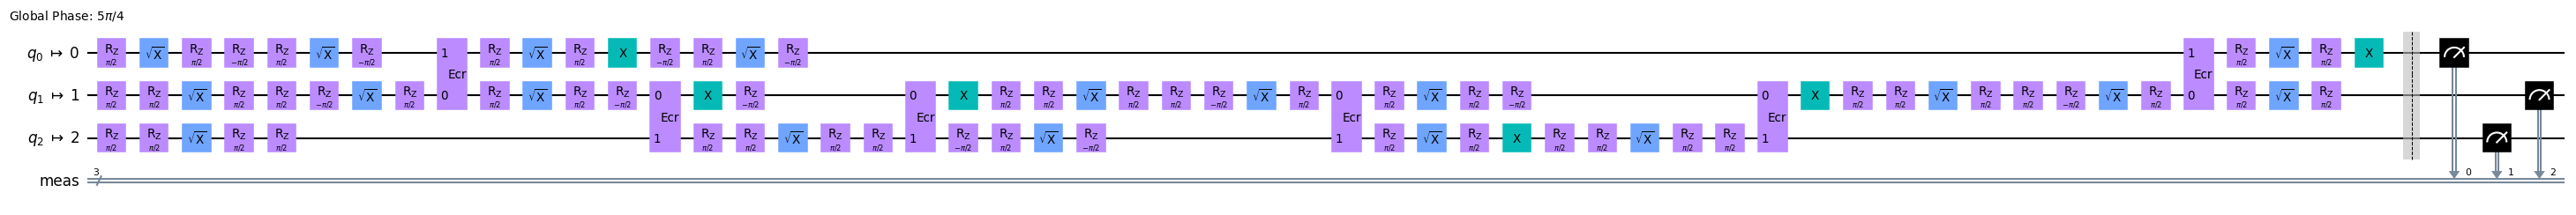

OrderedDict([('rz', 56), ('sx', 19), ('ecr', 6), ('x', 6), ('measure', 3), ('barrier', 1)]) 55


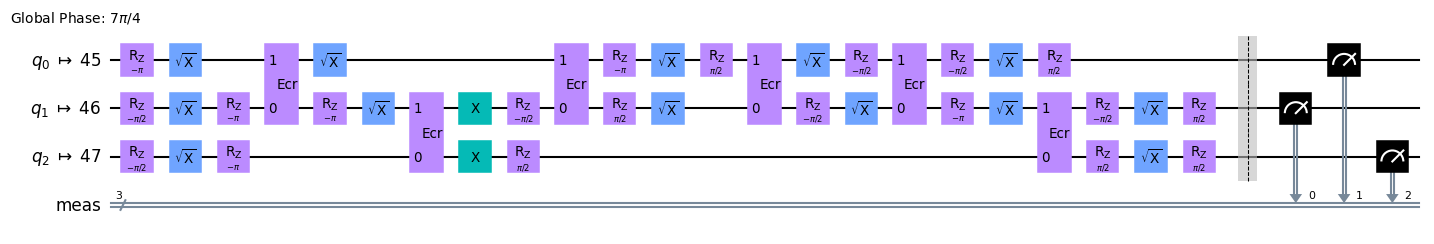

OrderedDict([('rz', 20), ('sx', 13), ('ecr', 6), ('measure', 3), ('x', 2), ('barrier', 1)]) 24


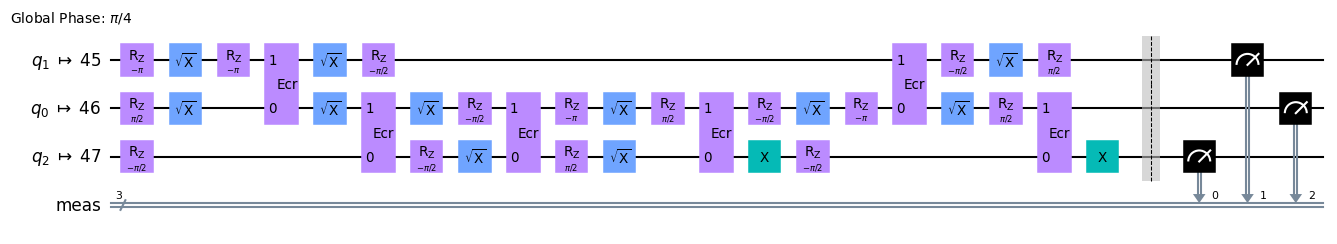

OrderedDict([('rz', 16), ('sx', 11), ('ecr', 6), ('measure', 3), ('x', 2), ('barrier', 1)]) 22


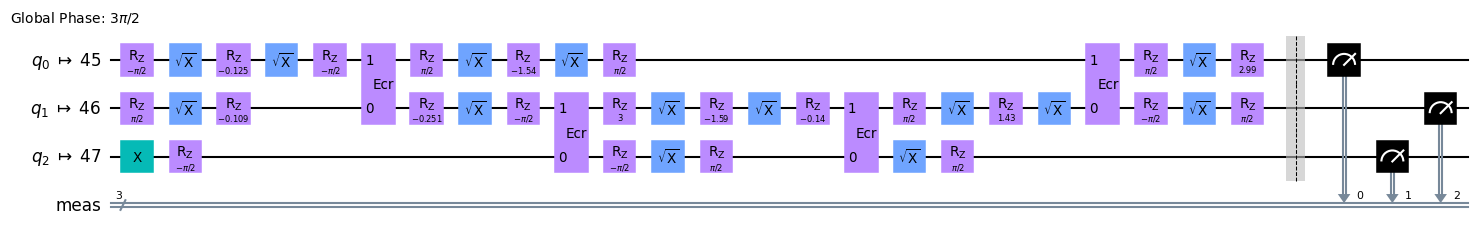

OrderedDict([('rz', 23), ('sx', 14), ('ecr', 4), ('measure', 3), ('x', 1), ('barrier', 1)]) 25


In [39]:
for ind in range(4):
    transpiled_circuit = transpile(circuit, backend,optimization_level=ind)
    display(transpiled_circuit.draw("mpl", idle_wires=False, scale = 0.75, fold=-1))
    print(transpiled_circuit.count_ops(),transpiled_circuit.depth())

La operacion de transpiling es un proceso estocástico, esto es, algo aleatorio y para que sea repetible podemos utilizar la opcion de fijar la semilla de inicio.

Prueba diferentes valores `seed_transpiler=0` y `seed_transpiler=11`  por ejemplo

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


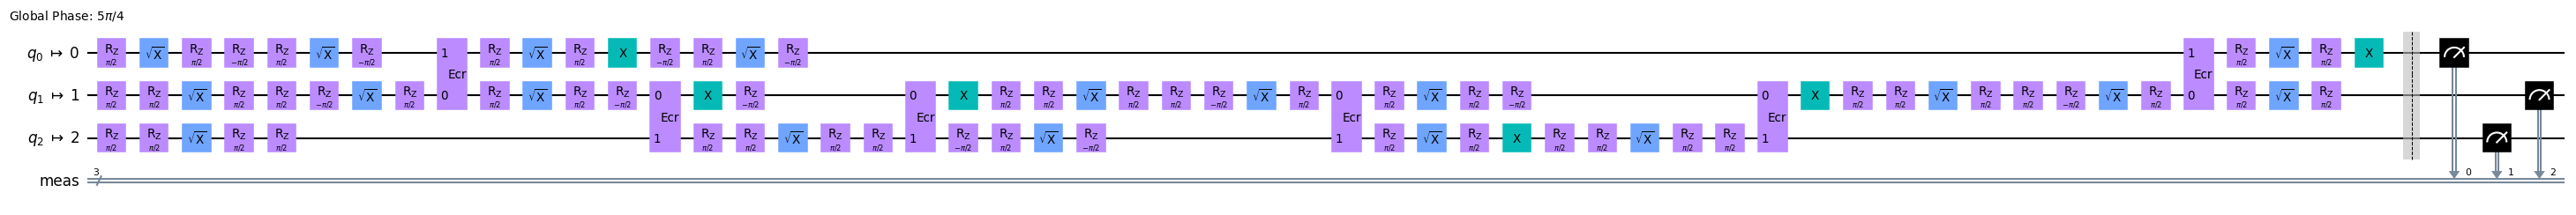

OrderedDict([('rz', 56), ('sx', 19), ('ecr', 6), ('x', 6), ('measure', 3), ('barrier', 1)]) 55


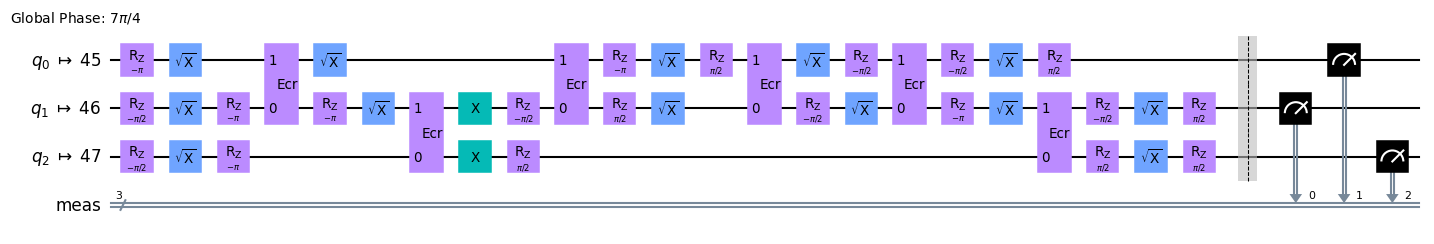

OrderedDict([('rz', 20), ('sx', 13), ('ecr', 6), ('measure', 3), ('x', 2), ('barrier', 1)]) 24


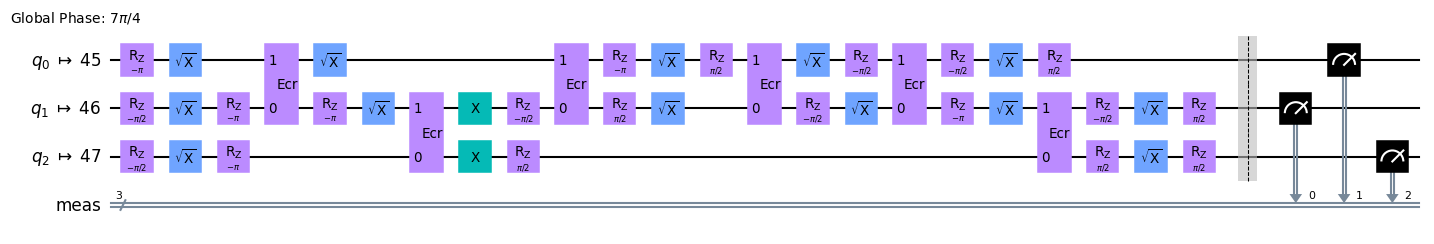

OrderedDict([('rz', 20), ('sx', 13), ('ecr', 6), ('measure', 3), ('x', 2), ('barrier', 1)]) 24


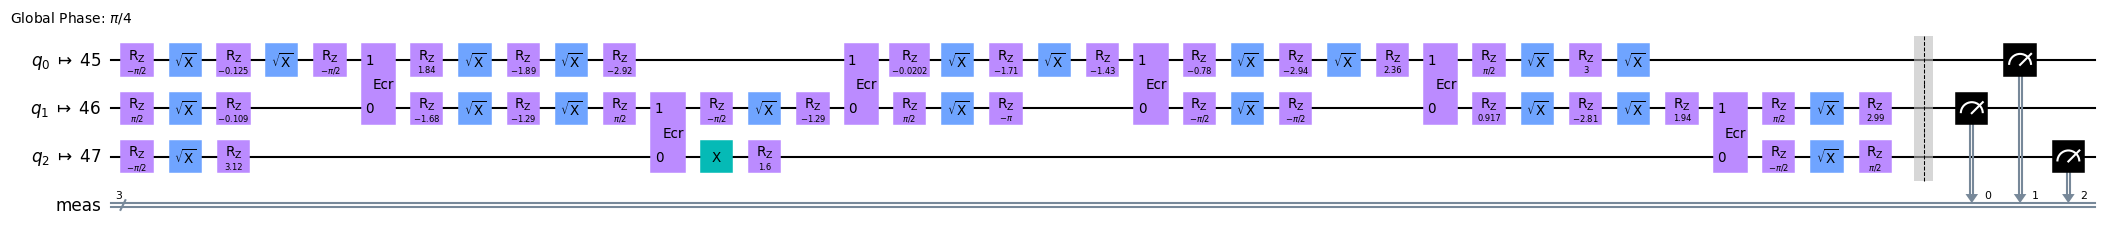

OrderedDict([('rz', 35), ('sx', 21), ('ecr', 6), ('measure', 3), ('x', 1), ('barrier', 1)]) 38


In [40]:
for ind in range(4):
    transpiled_circuit = transpile(circuit, backend,optimization_level=ind,seed_transpiler=11)
    display(transpiled_circuit.draw("mpl", idle_wires=False, scale = 0.75, fold=-1))
    print(transpiled_circuit.count_ops(),transpiled_circuit.depth())

### Las puertas base que soporta el dispositivo


Veamos las puestas de base del Backend

In [41]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'ecr', 'reset']

Podemos forzar a hacer un transpiling con unas determinadas puertas de base

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


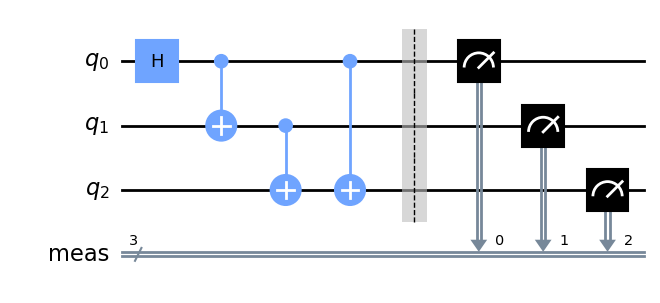

In [43]:
transpiled = transpile(circuit, basis_gates=['x', 'cx', 'h', 'p'])
transpiled.draw("mpl",fold=-1)

#### EJERCICIO

Dado un circuito, prueba hacer un transpilado al backend cuantico que no contenga alguna de las puertas base del backend

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


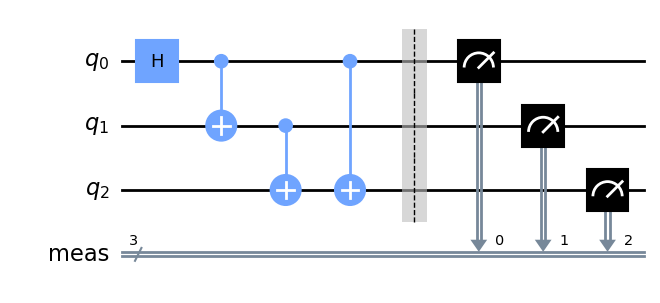

In [45]:
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1,2)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw("mpl")

### Controlando el despliegue del circuito en el dispositivo con `CouplingMap` e `initial_layout`

Podemos comprobar el `coupling_map` del backend de ejecucion cuantico

In [46]:
backend.configuration().coupling_map

[[0, 14],
 [1, 0],
 [1, 2],
 [3, 2],
 [4, 3],
 [4, 5],
 [6, 5],
 [7, 6],
 [8, 7],
 [8, 9],
 [8, 16],
 [9, 10],
 [11, 10],
 [11, 12],
 [12, 13],
 [15, 4],
 [16, 26],
 [17, 12],
 [17, 30],
 [18, 14],
 [18, 19],
 [19, 20],
 [21, 20],
 [22, 15],
 [22, 21],
 [22, 23],
 [23, 24],
 [25, 24],
 [25, 26],
 [27, 26],
 [27, 28],
 [28, 29],
 [28, 35],
 [30, 29],
 [30, 31],
 [31, 32],
 [32, 36],
 [33, 20],
 [33, 39],
 [34, 24],
 [34, 43],
 [37, 38],
 [38, 39],
 [39, 40],
 [40, 41],
 [42, 41],
 [43, 42],
 [44, 43],
 [44, 45],
 [46, 45],
 [47, 35],
 [47, 46],
 [48, 47],
 [49, 48],
 [49, 55],
 [50, 49],
 [50, 51],
 [51, 36],
 [52, 37],
 [53, 41],
 [53, 60],
 [54, 45],
 [54, 64],
 [55, 68],
 [56, 52],
 [57, 56],
 [57, 58],
 [59, 58],
 [59, 60],
 [61, 60],
 [62, 61],
 [62, 63],
 [63, 64],
 [64, 65],
 [65, 66],
 [67, 66],
 [67, 68],
 [68, 69],
 [70, 69],
 [71, 58],
 [72, 62],
 [73, 66],
 [73, 85],
 [74, 70],
 [75, 90],
 [76, 75],
 [76, 77],
 [77, 71],
 [77, 78],
 [79, 78],
 [79, 91],
 [80, 79],
 [81, 72],

#### EJERCICIO

Investiga las opciones de la funcion [`transpile`](https://docs.quantum.ibm.com/api/qiskit/0.28/qiskit.compiler.transpile#qiskitcompilertranspile)

Dado un circuito, prueba diferentes opciones de transpilacion:

- coupling_map -> [(0,1),(1,2)] 
- initial_layout -> [1, 0, 2], 
- basis_gates -> ['x', 'cx', 'h', 'p'], 
- optimization_level -> 3, 
- approximation_degree -> 0.99

y observa la complejidad del circuito transpilado midiendo las operaciones y la profundidad resultates.
Dibuja tambien el circuito.


/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


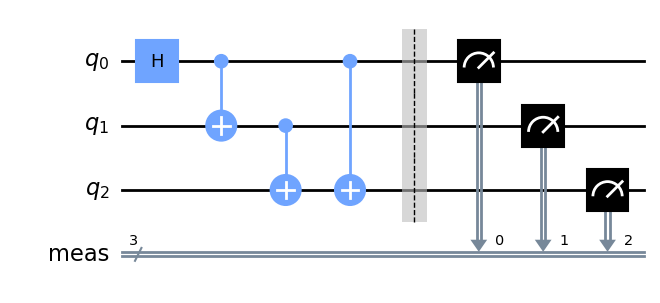

In [48]:
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1,2)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw("mpl")

In [49]:
from qiskit.transpiler import CouplingMap

cm=CouplingMap([(0,1),(1,2)])
               

transpiled = transpile(circuit,backend=backend,coupling_map=cm,initial_layout=[1, 0, 2],basis_gates=['x', 'cx', 'h', 'p'],optimization_level=3,approximation_degree=0.99)
            
print(transpiled.count_ops(), transpiled.depth())
display(transpiled.draw(fold=-1,idle_wires=False))

OrderedDict([('h', 11), ('cx', 6), ('measure', 3), ('barrier', 1)]) 13


┌───┐     ┌───┐                                              ░    ┌─┐   
q_1 -> 0 ┤ H ├──■──┤ H ├───────────────────────────■──────────────────░────┤M├───
         └───┘┌─┴─┐└───┘┌───┐     ┌───┐     ┌───┐┌─┴─┐┌───┐     ┌───┐ ░    └╥┘┌─┐
q_0 -> 1 ─────┤ X ├──■──┤ H ├──■──┤ H ├──■──┤ H ├┤ X ├┤ H ├──■──┤ H ├─░─────╫─┤M├
         ┌───┐└───┘┌─┴─┐├───┤┌─┴─┐├───┤┌─┴─┐└───┘└───┘└───┘┌─┴─┐├───┤ ░ ┌─┐ ║ └╥┘
q_2 -> 2 ┤ H ├─────┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├───────────────┤ X ├┤ H ├─░─┤M├─╫──╫─
         └───┘     └───┘└───┘└───┘└───┘└───┘               └───┘└───┘ ░ └╥┘ ║  ║ 
 meas: 3/════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                         0  1  2

## IonQ con Qiskit

Podemos ejecutar otro sofgware, como por ejemplo el de IonQ desde Qiskit

In [50]:
!pip install qiskit-ionq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 1.8 MB/s eta 0:00:00ta 0:00:01


In [52]:
from qiskit_ionq import IonQProvider
# provider = IonQProvider()

In [ ]:
[(b.name(), b.configuration().n_qubits) for b in provider.backends()]

In [ ]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw()

In [ ]:
backend = provider.get_backend("ionq_qpu")
job = backend.run(circuit)

In [ ]:
plot_histogram()

In [ ]:
job.get_counts()

In [ ]:
plot_histogram(job.get_counts())